In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [46]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [47]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [48]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [49]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

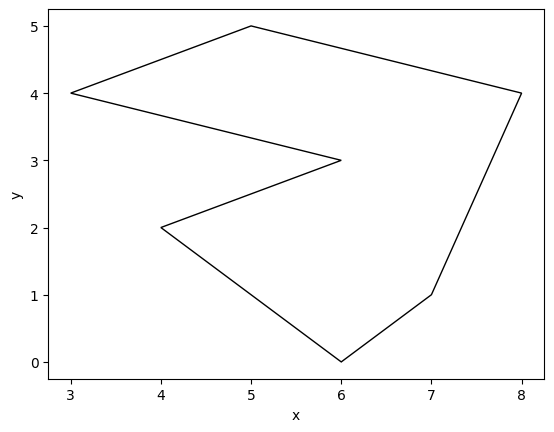

In [50]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [51]:
import numpy as np
import cv2

# ============================================================================

CANVAS_SIZE = (600,800)

FINAL_LINE_COLOR = (255, 255, 255)
WORKING_LINE_COLOR = (127, 127, 127)

# ============================================================================

class PolygonDrawer(object):
    def __init__(self, window_name):
        self.window_name = window_name # Name for our window

        self.done = False # Flag signalling we're done
        self.current = (0, 0) # Current position, so we can draw the line-in-progress
        self.points = [] # List of points defining our polygon


    def on_mouse(self, event, x, y, buttons, user_param):
        # Mouse callback that gets called for every mouse event (i.e. moving, clicking, etc.)

        if self.done: # Nothing more to do
            return

        if event == cv2.EVENT_MOUSEMOVE:
            # We want to be able to draw the line-in-progress, so update current mouse position
            self.current = (x, y)
        elif event == cv2.EVENT_LBUTTONDOWN:
            # Left click means adding a point at current position to the list of points
            print("Adding point #%d with position(%d,%d)" % (len(self.points), x, y))
            self.points.append((x, y))
        elif event == cv2.EVENT_RBUTTONDOWN:
            # Right click means we're done
            print("Completing polygon with %d points." % len(self.points))
            self.done = True


    def run(self):
        # Let's create our working window and set a mouse callback to handle events
        cv2.namedWindow(self.window_name, flags=cv2.WINDOW_AUTOSIZE)
        cv2.imshow(self.window_name, np.zeros(CANVAS_SIZE, np.uint8))
        cv2.waitKey(1)
        cv2.setMouseCallback(self.window_name, self.on_mouse)

        while(not self.done):
            # This is our drawing loop, we just continuously draw new images
            # and show them in the named window
            canvas = np.zeros(CANVAS_SIZE, np.uint8)
            if (len(self.points) > 0):
                # Draw all the current polygon segments
                cv2.polylines(canvas, np.array([self.points]), False, FINAL_LINE_COLOR, 1)
                # And  also show what the current segment would look like
                cv2.line(canvas, self.points[-1], self.current, WORKING_LINE_COLOR)
            # Update the window
            cv2.imshow(self.window_name, canvas)
            # And wait 50ms before next iteration (this will pump window messages meanwhile)
            if cv2.waitKey(50) == 27: # ESC hit
                self.done = True

        # User finised entering the polygon points, so let's make the final drawing
        canvas = np.zeros(CANVAS_SIZE, np.uint8)
        # of a filled polygon
        if (len(self.points) > 0):
            cv2.fillPoly(canvas, np.array([self.points]), FINAL_LINE_COLOR)
        # And show it
        cv2.imshow(self.window_name, canvas)
        # Waiting for the user to press any key
        cv2.waitKey()

        cv2.destroyWindow(self.window_name)
        return canvas
    
# ============================================================================

In [52]:
'''
Po uruchomieniu programu:
- lewy przycisk myszy: dodanie nowego punktu do wielokąta
- prawy przycisk myszy: zakończenie dodawania punktów do wielokąta
- dowolny klawisz z klawiatury: po zakończeniu dodawania punktów doprowadzi do zatrzymania procesu rysowania
'''
def createPolygon():
    pd = PolygonDrawer("Polygon")
    pd.run()
    polygon_pre = pd.points
    polygon = []
    for a,b in polygon_pre:
        polygon.append((a,600-b))
    print("Polygon = %s" % polygon)
    return polygon

In [53]:
myPolygon = createPolygon()

Adding point #0 with position(324,510)
Adding point #1 with position(160,400)
Adding point #2 with position(399,303)
Adding point #3 with position(165,205)
Adding point #4 with position(412,115)
Adding point #5 with position(201,78)
Adding point #6 with position(677,40)
Adding point #7 with position(477,170)
Adding point #8 with position(675,290)
Adding point #9 with position(476,367)
Adding point #10 with position(658,468)
Adding point #11 with position(327,557)
Completing polygon with 12 points.
Polygon = [(324, 90), (160, 200), (399, 297), (165, 395), (412, 485), (201, 522), (677, 560), (477, 430), (675, 310), (476, 233), (658, 132), (327, 43)]


## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [54]:
def is_y_monotonic(polygon):
    n = len(polygon)
    direction = polygon[1][1] -polygon[0][1] # + gdy idziemy w gore, - gdy idziemy w dol
    i = 2
    while direction==0:
        direction = polygon[i][1] -polygon[i-1][1]
        i+=1
    while i<n and direction*(polygon[i][1]-polygon[i-1][1])>=0:
        i+=1
    direction*=-1
    while i<n and direction*(polygon[i][1]-polygon[i-1][1])>=0:
        i+=1
    direction*=-1
    while i<n and direction*(polygon[i][1]-polygon[i-1][1])>=0:
        i+=1
    return i==n

Przeprowadź test poprawności powyższej funkcji.

In [55]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [56]:
print(is_y_monotonic(myPolygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

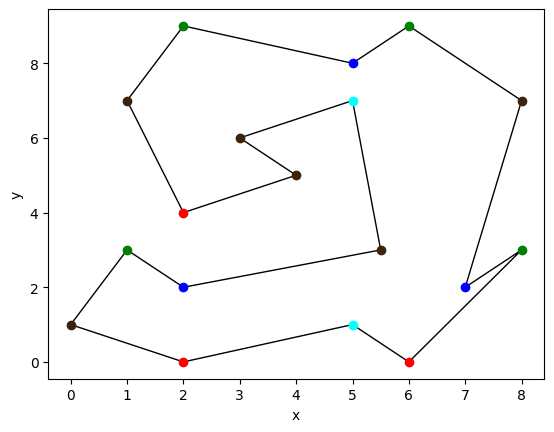

In [57]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [58]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def orient(a, b, c):
        return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
    
    def check(a, b, c):
        val = orient(a,b,c)
        if a[1]<b[1] and c[1]<b[1]:
            if val<0:
                return 3
            if val>0:
                return 0
        elif a[1]>b[1] and c[1]>b[1]:
            if val<0:
                return 2
            if val>0:
                return 1
        return 4
          

    n = len(polygon)
    T = []

    T.append(check(polygon[-1],polygon[0],polygon[1]))

    for i in range(1,n-1):
        T.append(check(polygon[i-1],polygon[i],polygon[i+1]))


    T.append(check(polygon[-2],polygon[-1],polygon[0]))

    return T

Przeprowadź test poprawności powyższej funkcji. 

In [59]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

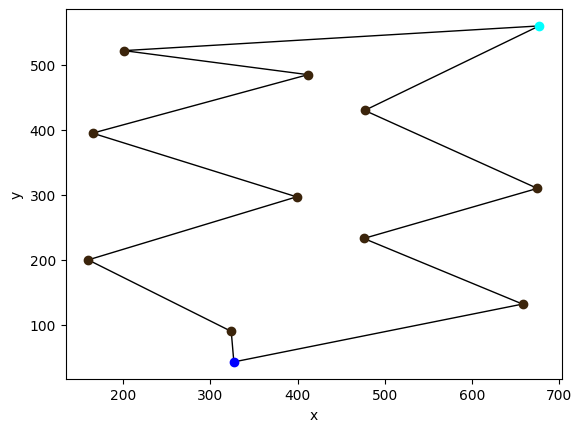

In [60]:
colors = color_vertex(myPolygon)
draw_polygon_colors(myPolygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

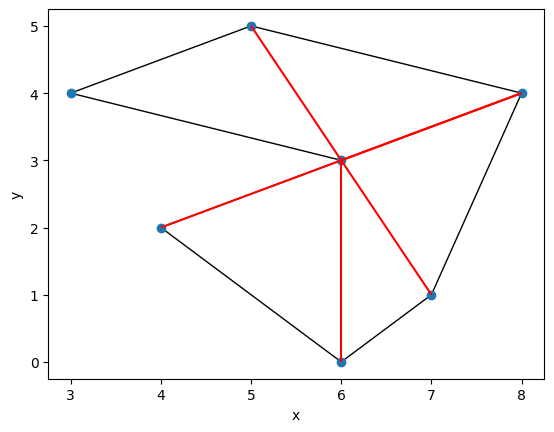

In [61]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [62]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """


    def orient(a, b, c):
        return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
    
    
    n = len(polygon)
    diagonals = [] # tablica zbiorów dwuelementowych symbolizujących przekątne
    edges = {} # słownik gdzie kluczami są indeksy wierchołków, a wartościami tablice indeksów wierchołków, z
               # którymi klucze tworzą krawędź wielokąta lub krawędź triangulacji
    edges[0] = [n-1,1]
    edges[n-1] = [n-2,0]
    for i in range(1,n-1):
        edges[i] = [i-1, i+1]
    
    
    # Stworzenie łańcuchów left i right
    top = max(polygon, key=lambda x: x[1])
    id_top = polygon.index(top)
    bottom = min(polygon, key=lambda x: x[1])
    id_bottom = polygon.index(bottom)
    right = []
    left = []
    if id_bottom>id_top:
        for i in range(id_top+1, id_bottom):
            left.append(i)
        for i in range(id_bottom, n):
            right.append(i)
        for i in range(0, id_top+1):
            right.append(i)
    else:
        for i in range(id_bottom, id_top+1):
            right.append(i)
        for i in range(id_top+1, n):
            left.append(i)
        for i in range(0, id_bottom):
            left.append(i)
    right.reverse()
    
    

    # Sortowanie wierzchołków
    sorted_poly = []
    len1, len2 = len(left), len(right)
    i = 0
    j = 0
    while i < len1 and j < len2:
        if polygon[left[i]][1]>polygon[right[j]][1]:
            sorted_poly.append(left[i])
            i+=1
        else:
            sorted_poly.append(right[j])
            j+=1
    if i==len1:
        sorted_poly+=right[j:len2]
    elif j==len2:
        sorted_poly+=left[i:len1]

    
    # Algorytm ze stosem
    S = sorted_poly[0:2] # Stos
    i = 2
    while i < n:
        current = sorted_poly[i]
        bool1 = S[-1] in right
        bool2 = current in right
        if (bool1 and not bool2) or (not bool1 and bool2):
            for v in S:
                diagonal = set([v, current])
                if current not in edges[v]:
                    diagonals.append(diagonal)
                    edges[v].append(current)
                    edges[current].append(v)
            S = [S[-1], current]
        else:   
            while True:
                head = S.pop(-1)
                v = S.pop(-1)
                val = orient(polygon[current],polygon[head],polygon[v])
                check = val<0 if current in left else val>0
                if check:
                    diagonal = set([v, current])
                    if current not in edges[v]:
                        diagonals.append(diagonal)
                        edges[v].append(current)
                        edges[current].append(v)
                    S.append(v)
                    if len(S)==1:
                        S.append(current)
                        break
                else:
                    S.append(v)
                    S.append(head)
                    S.append(current)
                    break
        i+=1


    # Zamiana danych wyjściowych na oczekiwany format  
    result = []
    for diagonal in diagonals:
        a = tuple(diagonal)
        result.append([a[0], a[1]])
    #input = [(polygon[a],polygon[b]) for a,b in result] 
    #draw_polygon_tri(polygon, input)
    return result



Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [63]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [64]:
def draw_triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    vis = Visualizer()
    

    def orient(a, b, c):
        return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
    
    
    n = len(polygon)

    # Stworzenie łańcuchów left i right
    top = max(polygon, key=lambda x: x[1])
    id_top = polygon.index(top)
    bottom = min(polygon, key=lambda x: x[1])
    id_bottom = polygon.index(bottom)
    right = []
    left = []
    if id_bottom>id_top:
        for i in range(id_top+1, id_bottom):
            left.append(i)
        for i in range(id_bottom, n):
            right.append(i)
        for i in range(0, id_top+1):
            right.append(i)
    else:
        for i in range(id_bottom, id_top+1):
            right.append(i)
        for i in range(id_top+1, n):
            left.append(i)
        for i in range(0, id_bottom):
            left.append(i)
    right.reverse()
    

    R = [polygon[i] for i in right] # right chain to draw
    L = [polygon[i] for i in left] # left chain to draw
    # vis.add_point(R, color="red")
    # vis.add_point(L, color="blue")
    vis.add_point(polygon,color='black')
    
    
    edges = [] # tablica zbiorów dwuelementowych symbolizujących krawędzie
    diagonals = [] # tablica zbiorów dwuelementowych symbolizujących przekątne
    E = [] # edges to draw
    edges.append(set([n-1,0]))
    E.append((polygon[0],polygon[-1]))
    for i in range(1,n):
        edges.append(set([i-1, i]))
        E.append((polygon[i-1],polygon[i]))

    vis.add_line_segment(E, color="black")

    # Sortowanie wierzchołków
    sorted_poly = []
    len1, len2 = len(left), len(right)
    i = 0
    j = 0
    while i < len1 and j < len2:
        if polygon[left[i]][1]>polygon[right[j]][1]:
            sorted_poly.append(left[i])
            i+=1
        else:
            sorted_poly.append(right[j])
            j+=1
    if i==len1:
        sorted_poly+=right[j:len2]
    elif j==len2:
        sorted_poly+=left[i:len1]

    
    # Algorytm ze stosem
    S = sorted_poly[0:2] # Stos
    i = 2
    while i < n:
        stack_points = vis.add_point([polygon[i] for i in S], color='green')
        current = sorted_poly[i]
        current_point = vis.add_point(polygon[current], color = 'red')
        bool1 = S[-1] in right
        bool2 = current in right
        if (bool1 and not bool2) or (not bool1 and bool2):
            for v in S:
                diagonal = set([v, current])
                to_delete = vis.add_line_segment((polygon[v],polygon[current]), color="red")
                if diagonal not in diagonals and diagonal not in edges:
                    diagonals.append(diagonal)
                    vis.add_line_segment((polygon[v],polygon[current]), color="purple")
                else:
                    vis.remove_figure(to_delete)
            S = [S[-1], current]
        else:   
            while True:
                head = S.pop(-1)
                v = S.pop(-1)
                val = orient(polygon[current],polygon[head],polygon[v])
                check = val<0 if current in left else val>0
                if check:
                    diagonal = set([v, current])
                    to_delete = vis.add_line_segment((polygon[v],polygon[current]), color="red")
                    if diagonal not in diagonals and diagonal not in edges: 
                        diagonals.append(diagonal)
                        vis.add_line_segment((polygon[v],polygon[current]), color="purple")
                    else:
                        vis.remove_figure(to_delete)
                    S.append(v)
                    if len(S)==1:
                        S.append(current)
                        break
                else:
                    S.append(v)
                    S.append(head)
                    S.append(current)
                    break
        vis.remove_figure(stack_points)
        vis.remove_figure(current_point)
        i+=1
   
    return vis, diagonals



Adding point #0 with position(348,529)
Adding point #1 with position(187,331)
Adding point #2 with position(382,143)
Adding point #3 with position(558,336)
Adding point #4 with position(361,579)
Completing polygon with 5 points.
Polygon = [(348, 71), (187, 269), (382, 457), (558, 264), (361, 21)]
Adding point #0 with position(358,375)
Adding point #1 with position(222,298)
Adding point #2 with position(325,233)
Adding point #3 with position(139,138)
Adding point #4 with position(416,63)
Adding point #5 with position(755,272)
Adding point #6 with position(273,290)
Adding point #7 with position(713,467)
Adding point #8 with position(399,545)
Completing polygon with 9 points.
Polygon = [(358, 225), (222, 302), (325, 367), (139, 462), (416, 537), (755, 328), (273, 310), (713, 133), (399, 55)]
Adding point #0 with position(520,514)
Adding point #1 with position(384,407)
Adding point #2 with position(548,283)
Adding point #3 with position(355,186)
Adding point #4 with position(548,131)
Addin

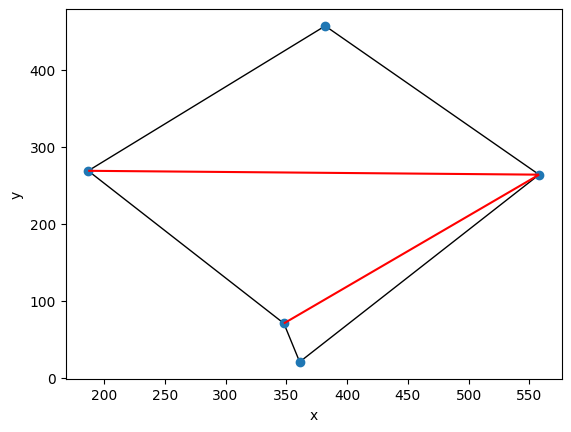

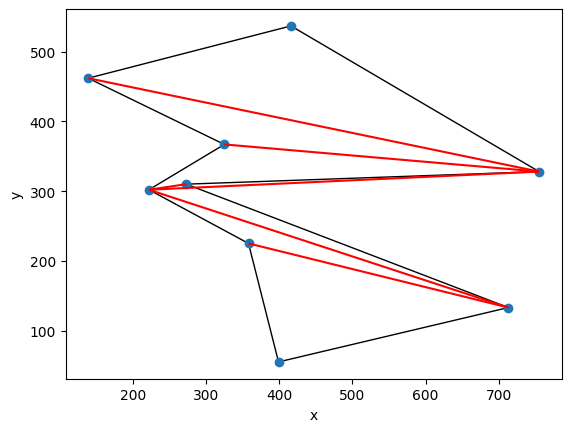

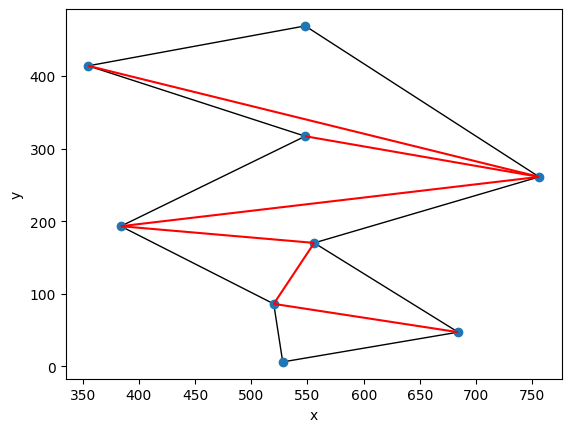

In [65]:
# Narzędzie do zadawania n wielokątów pod rząd i wypisania ich triangulacji
polygons = []
n=3
for i in range(n):   
    polygons.append(createPolygon())

for i in range(n):
    input = [[polygons[i][a], polygons[i][b]] for a,b in triangulation(polygons[i])] 
    draw_polygon_tri(polygons[i],input)


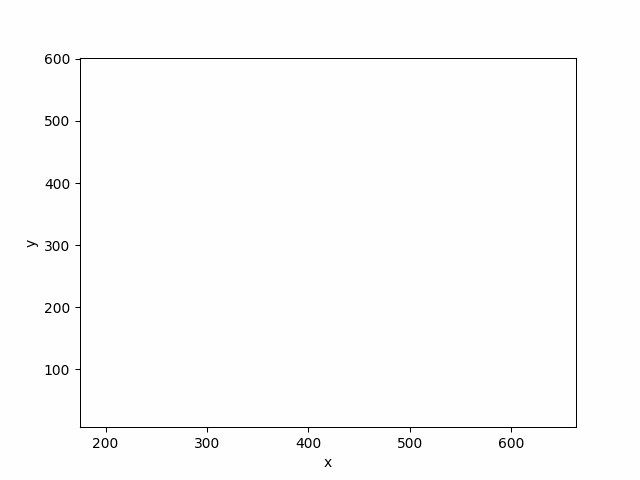

In [66]:
# Wygenerowane wielokąty

'''
polygon1 - choinka
polygon1 - wielokąt zasugerowany na laboratoriach
'''

polygon1=[(441, 80), (439, 135), (588, 141), (437, 209), (606, 220), (414, 308), (624, 329), (430, 400), (613, 432), (384, 512), (183, 421), (320, 410), (170, 345), (325, 328), (178, 229), (338, 217), (193, 148), (365, 141), (359, 86)]
polygon2=[(438, 86), (608, 162), (275, 222), (582, 279), (403, 379), (642, 424), (490, 463), (624, 524), (286, 575), (197, 34)]

current_polygon = polygon2
vis, diag = draw_triangulation(current_polygon)
vis.show_gif(interval=700)